#**Task:** Identify key features that affect house prices in Sydney after analyzing them using **Decision tree**

**1. Business Problem & Objective**



Sydney, being one of Australia's major cities, boasts a dynamic housing market

*   driven by various factors. From its economic conditions to the sheer convenience of transportation, myriad elements play a role in determining the house prices in this bustling metropolis. For stakeholders, ranging from individual investors to government agencies, understanding these driving factors and having the capability to predict prices is invaluable.

*  This study aims to harness historical housing data from Sydney to build a model that captures the essence of past housing price trends. Using the SydneyHousePrice.csv dataset, we delve into the intricacies of the housing market in Sydney from the period of 2016 to 2021. By doing so, we hope to shed light on the major factors that have historically influenced housing prices in this timeframe.

**2. Data understanding and Explolation**


*   Understanding and exploring data is a foundational step in building a machine learning model. Without this step, there might be a lack of awareness regarding the characteristics, distribution, and relationships among variables in the data. This can lead to a decrease in model performance. Through the process of understanding and exploring data, one can identify patterns, outliers, missing values, and other critical features within the data. This becomes invaluable in subsequent data preprocessing and modeling stages.


**2.1 Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**2.2 Load the Data frome google drive(SydneyHousePrice.csv)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Code for Mount Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specifies the path & Load the data
file_path = "/content/drive/My Drive/SydneyHousePrice.csv"
data = pd.read_csv(file_path)

**2.3 Description of the Dataset**

1. price: Price of Property

2. date_sold: Date sold

3. suburb: Region name

4. num_bath: Num of bathrooms

5. num_bed: Number of bedrooms

6. num_parking: Number of parking spaces

7. property_size: Size of property

8. type: Property type

9. suburb_population: Local population

10. suburb_median_income: Local median income

11. suburb_sqkm: Suburb area size (square kilometers)

12. suburb_lat: Latitude of suburb

13. suburb_lng: Longitude of suburb

14. suburb_elevation: Elevation of surburb

15. cash_rate: Cash ratio at the time of sale

16. property_inflation_index: Property inflation index

17. km_from_cbd: Distance from Central Business District (km)

**2.4 Exploratory Data Analysis**

In [ ]:
data.head()
#Display the data

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,13/01/2016,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,13/01/2016,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,13/01/2016,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59
3,452000,13/01/2016,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12
4,365500,13/01/2016,North Avoca,0,0,0,1850,Vacant land,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98


In [ ]:
data.info()
#Checking data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     11160 non-null  int64  
 1   date_sold                 11160 non-null  object 
 2   suburb                    11160 non-null  object 
 3   num_bath                  11160 non-null  int64  
 4   num_bed                   11160 non-null  int64  
 5   num_parking               11160 non-null  int64  
 6   property_size             11160 non-null  int64  
 7   type                      11160 non-null  object 
 8   suburb_population         11160 non-null  int64  
 9   suburb_median_income      11160 non-null  int64  
 10  suburb_sqkm               11160 non-null  float64
 11  suburb_lat                11160 non-null  float64
 12  suburb_lng                11160 non-null  float64
 13  suburb_elevation          11160 non-null  int64  
 14  cash_r

price                       1.000000
num_bath                    0.395310
suburb_median_income        0.365452
num_bed                     0.314329
property_inflation_index    0.229929
num_parking                 0.228236
suburb_lng                  0.177976
property_size               0.099212
suburb_elevation           -0.008412
suburb_population          -0.038954
suburb_lat                 -0.109136
suburb_sqkm                -0.153286
cash_rate                  -0.236636
km_from_cbd                -0.358321
Name: price, dtype: float64


<ipython-input-6-7daf8aa93ee4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


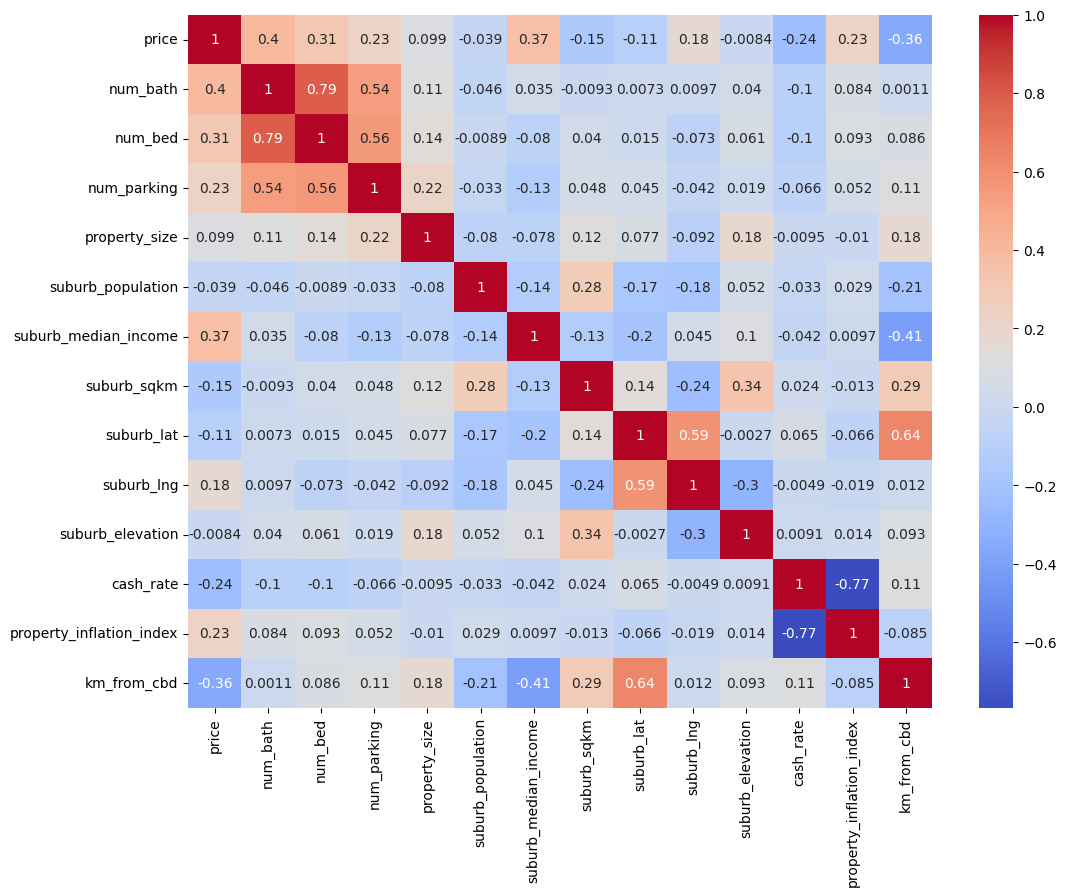

In [ ]:
#Calculate and display correlation between price and other variables
correlation = data.corr()
price_correlation = correlation["price"].sort_values(ascending=False)
print(price_correlation)
plt.figure(figsize=(12, 9))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

**3.  Data Preprocessing**

*   Data preprocessing is the process of transforming raw data into a form suitable for modeling. Real-world data is often imperfect and may contain outliers. Failing to address these issues can adversely affect model performance. Hence, data preprocessing stands as a pivotal step in optimizing model performance.


**3.1 Handling Missing Values**

In [ ]:
#Checking the missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

for column in data.columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mean(), inplace=True)

Missing values per column:
price                       0
date_sold                   0
suburb                      0
num_bath                    0
num_bed                     0
num_parking                 0
property_size               0
type                        0
suburb_population           0
suburb_median_income        0
suburb_sqkm                 0
suburb_lat                  0
suburb_lng                  0
suburb_elevation            0
cash_rate                   0
property_inflation_index    0
km_from_cbd                 0
dtype: int64


**3.2 Handling Outlier and Variable**

In [ ]:
#reset the dataframe's index
data.reset_index(drop=True, inplace=True)

#Removing outliers
z_scores = zscore(data.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_cleaned = data[filtered_entries].copy()

#Extracting year, month, day from date data
data_cleaned['year_sold'] = pd.to_datetime(data_cleaned['date_sold'], dayfirst=True).dt.year
data_cleaned['month_sold'] = pd.to_datetime(data_cleaned['date_sold'], dayfirst=True).dt.month
data_cleaned['day_sold'] = pd.to_datetime(data_cleaned['date_sold'], dayfirst=True).dt.day
data_cleaned.drop('date_sold', axis=1, inplace=True)

#One-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=['suburb', 'type'], drop_first=True)

**4. Model Building & Evaluation**

*   During the model building phase, a Decision Tree algorithm was chosen due to its capability to handle non-linear relationships. Decision Trees work by recursively splitting the dataset into subsets based on the feature that minimizes the variance, especially in the context of regression tasks. After building the tree using the training data, its performance was evaluated on the test data using various metrics.



**4.1 Splitting Data into Training and Testing Sets**

In [ ]:
#Splitting features and target variable(price)
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

#Splitting training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Save feature names
feature_names = X.columns

**4.2 Building Model(Decision Tree)**

*   "Decision Trees, especially for regression tasks, work by reducing the variance. They try to find the feature and the threshold that will result in the largest variance reduction for our target variable (in this case, the house price). The mathematical formula for variance reduction is:

$$
\text{Variance Reduction} = \text{Variance(before split)} - p_{\text{left}} \times \text{Variance(left)} - p_{\text{right}} \times \text{Variance(right)}
$$




> Where:
- $( \text{Variance(before split)} $) is the variance of the target variable before any split.
- $( p_{\text{left}} $) and $( p_{\text{right}} $) are the proportions of the data going to the left and right child nodes, respectively."


In [ ]:
#Define Decision Tree Regressor model
class DecisionTreeRegressor:

    # Initiate function, set min_samples_split and max_depth
    def __init__(self, min_samples_split=None, max_depth=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None
        self.feature_importances_ = None

    # Model training function. Build decision trees using the given data.
    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)
        self._compute_feature_importances(X, y)

    def _build_tree(self, X, y, depth):

        if depth == self.max_depth or len(X) < self.min_samples_split:
            return np.mean(y)

        best_split = self._find_best_split(X, y)
        if not best_split:
            return np.mean(y)

        feature, threshold, left_indices, right_indices = best_split
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return (feature, threshold, left_tree, right_tree)

    def _find_best_split(self, X, y):
        best_mse = float('inf')
        best_split = None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature] <= threshold)
                right_indices = np.where(X[:, feature] > threshold)

                if len(left_indices[0]) == 0 or len(right_indices[0]) == 0:
                    continue

                left_mse = np.var(y[left_indices])
                right_mse = np.var(y[right_indices])

                mse = (len(left_indices[0]) * left_mse + len(right_indices[0]) * right_mse) / len(y)

                if mse < best_mse:
                    best_mse = mse
                    best_split = (feature, threshold, left_indices, right_indices)

        return best_split

    # A function that returns a predicted value for a particular sample.
    def predict(self, X):
        return np.array([self._predict_sample(sample) for sample in X])

    def _predict_sample(self, sample):
        node = self.tree
        while isinstance(node, tuple):
            feature, threshold, left_tree, right_tree = node
            if sample[feature] <= threshold:
                node = left_tree
            else:
                node = right_tree
        return node

    # A function that calculates the importance of a features(variables).
    def _compute_feature_importances(self, X, y):
        # Initialize feature importances as zeros
        self.feature_importances_ = np.zeros(X.shape[1])

        # Compute the importance recursively
        self._compute_node_importance(self.tree, X, y)

        # Normalize feature importances to sum up to 1
        self.feature_importances_ /= np.sum(self.feature_importances_)

    def _compute_node_importance(self, node, X, y):
        if not isinstance(node, tuple):  # If it's a leaf node
            return 0

        feature, threshold, left_tree, right_tree = node
        left_indices = np.where(X[:, feature] <= threshold)
        right_indices = np.where(X[:, feature] > threshold)

        # Calculate MSE before the split
        mse_before_split = np.var(y) * len(y)

        # Calculate MSE of the left and right child after the split
        mse_left = np.var(y[left_indices]) * len(y[left_indices])
        mse_right = np.var(y[right_indices]) * len(y[right_indices])

        # Calculate the importance as the decrease in MSE
        importance = mse_before_split - (mse_left + mse_right)

        # Accumulate importance for the feature
        self.feature_importances_[feature] += importance

        # Recurse for left and right subtree
        self._compute_node_importance(left_tree, X[left_indices], y[left_indices])
        self._compute_node_importance(right_tree, X[right_indices], y[right_indices])


**4.3 Model Training & Evaluation**



*   "After training our Decision Tree model, we evaluate its performance using the Mean Squared Error (MSE). The MSE provides a measure of how well the model's predictions match the actual values. It's calculated as:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

> Where:
*   $( y_i $) is the actual value.
*   $( \hat{y}_i $) is the predicted value by the model."

---


*   "Another metric we use is the R-squared or R2 score. It indicates the proportion of the variance in the dependent variable (house price) that is predictable from the independent variables (features). The formula for R2 score is:

$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

> Where:

*   $( \text{SS}_{\text{res}} $) is the residual sum of squares.
*   $( \text{SS}_{\text{tot}} $) is the total sum of squares."

Best parameters: {'max_depth': 11, 'min_samples_split': 50}
Best MSE: 251688352583.9682
Best R2 Score: 0.6479815245094308


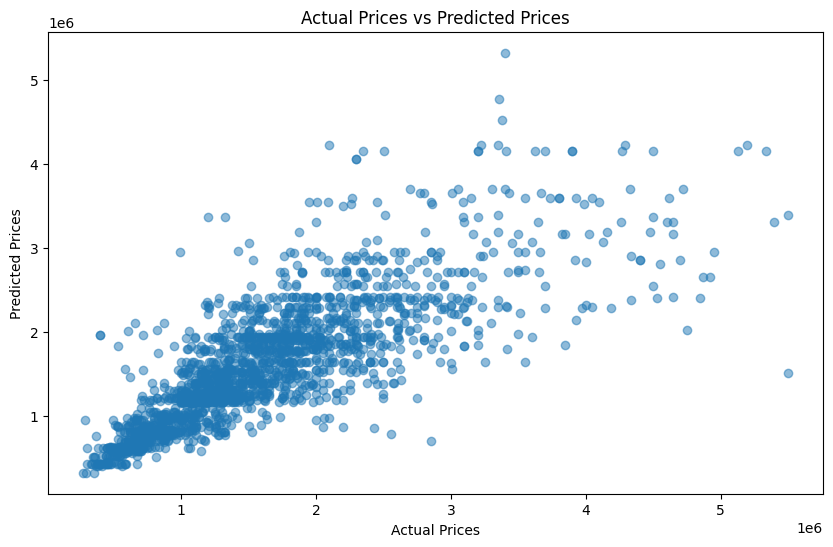

In [ ]:
#Finding the best parameters for model training
best_mse = float('inf')
best_params = {}

for depth in [10, 11, 12]:
    for split in [20, 30, 40, 50, 60]:
        model = DecisionTreeRegressor(min_samples_split=split, max_depth=depth)
        model.fit(X_train.values, y_train.values)
        predictions = model.predict(X_test.values)
        mse = mean_squared_error(y_test, predictions)

        if mse < best_mse:
            best_mse = mse
            best_params = {"max_depth": depth, "min_samples_split": split}
            best_predictions = predictions

#Display results of the best model
print(f"Best parameters: {best_params}")
print(f"Best MSE: {best_mse}")
print(f"Best R2 Score: {r2_score(y_test, best_predictions)}")

#Visualize prediction results
plt.figure(figsize=(10,6))
plt.scatter(y_test, best_predictions, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Model Evaluation and Optimization:


*   The Decision Tree model implemented in this study was evaluated using Mean Squared Error (MSE) and $R^2$ values. MSE offers insights into the predictive errors of the model, with lower values indicating better performance. In contrast, the $R^2$ value depicts how well the model explains the variability in the data, with values closer to 1 indicating superior predictive ability.

*   To optimize the model's performance, various hyperparameter combinations were experimented with. Specifically, combinations of 'max_depth' and 'min_samples_split' were evaluated to enhance the model's efficiency. Through this rigorous process, the optimal hyperparameters were identified, yielding an MSE of 251,688,352,583.9682 and an $R^2$ value of 0.6479.

*   This result suggests that the Decision Tree model has reasonably captured the primary features influencing past house prices in Sydney. However, a comparison with other machine learning models would provide a more comprehensive evaluation of its relative performance.

**5. Feature Importance Analysis and Visualization**

*   Feature importance analysis and visualization assesses the importance of each feature in model prediction based on it after the model is trained, thereby identifying important features and eliminating unnecessary features can improve model performance.

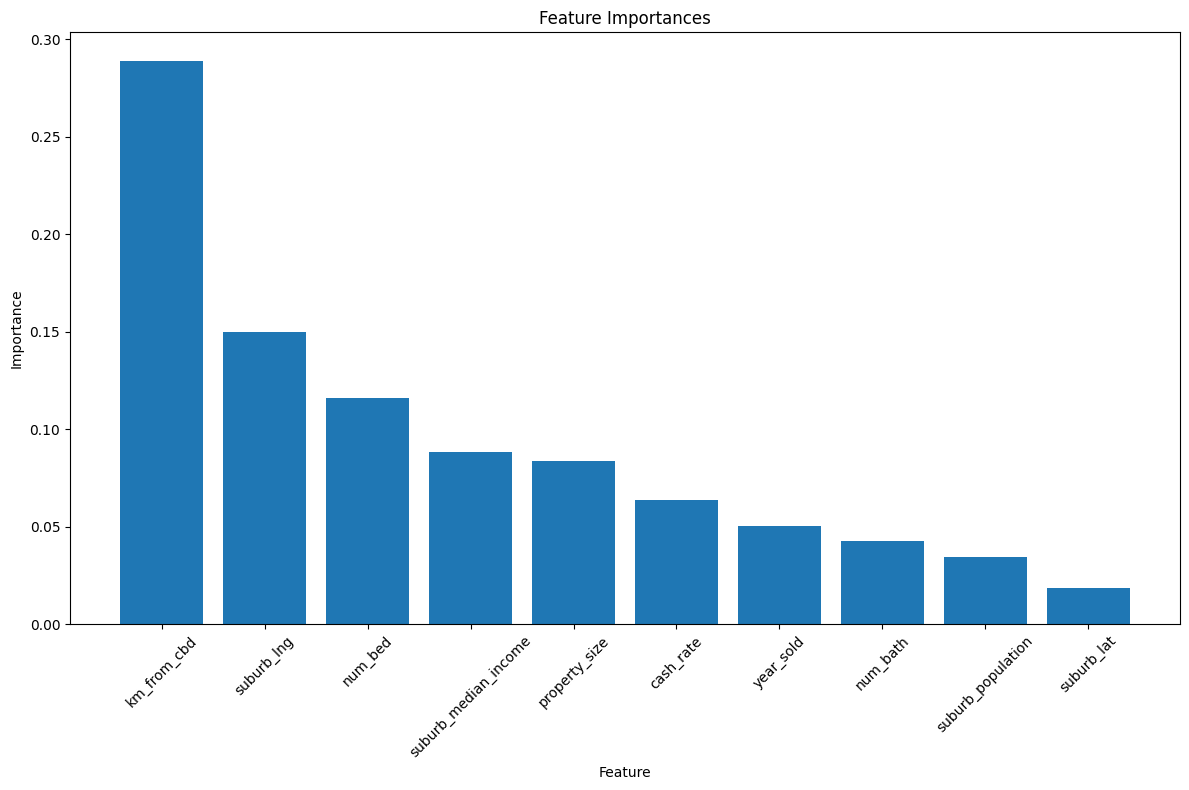

In [ ]:
#Visualizing feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = X.columns

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(10), importances[indices][:10], align="center")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

**6. Data Exploration and Visualization**

*   Data exploration and visualization involve visually understanding the distribution of data, relationships among features, and other patterns. This provides insights into the data, allows for the identification of issues, and offers opportunities to improve model performance.



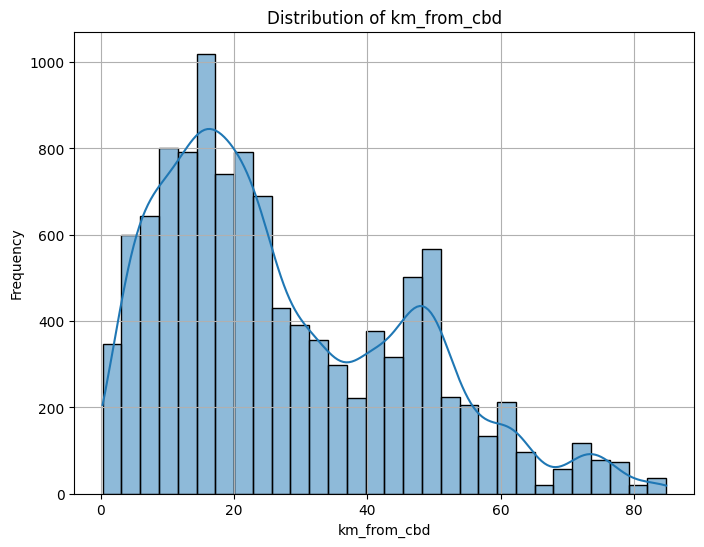

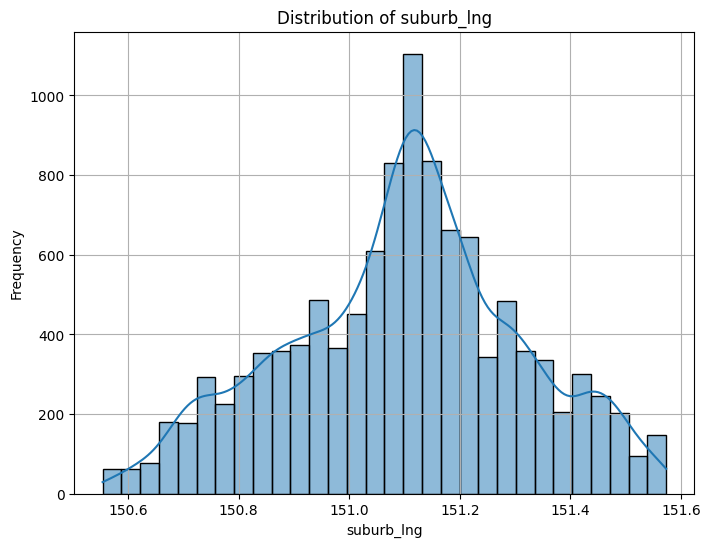

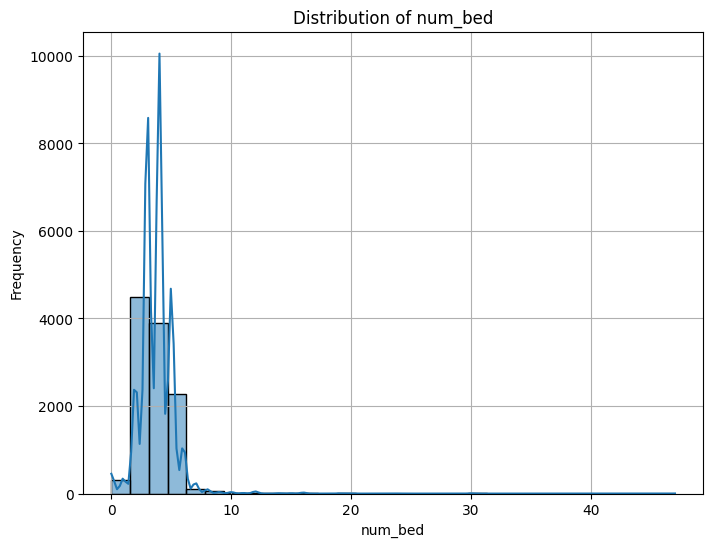

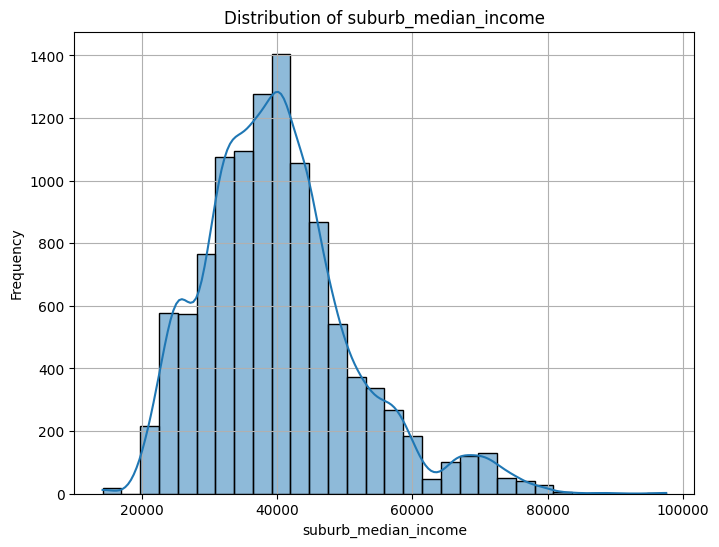

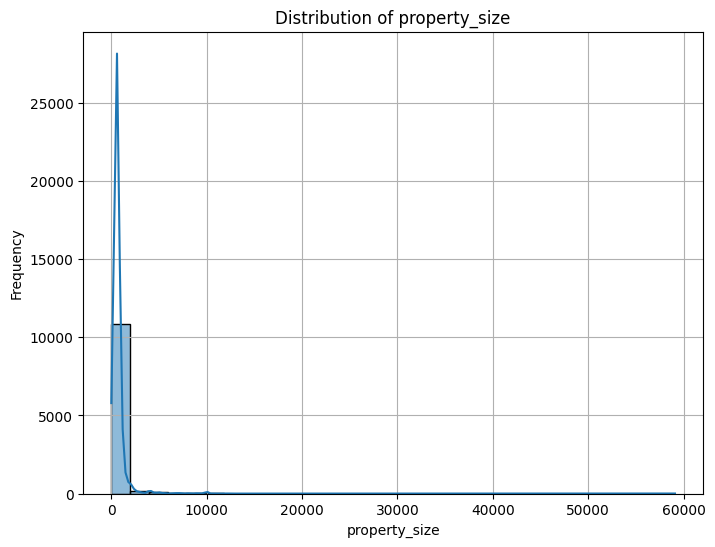

In [ ]:
# Visualizing distribution of top features
top_features = feature_names[indices[:5]]

for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

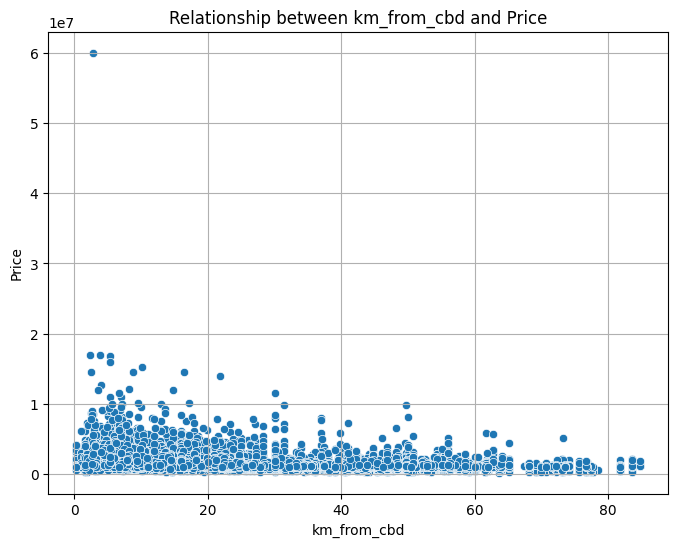

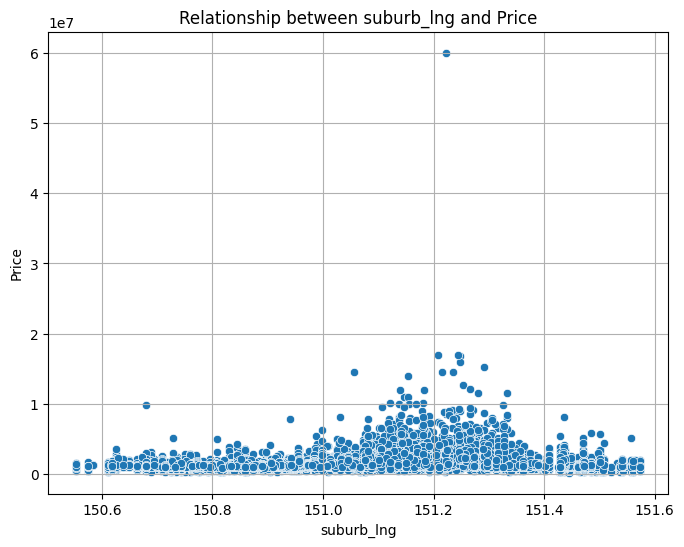

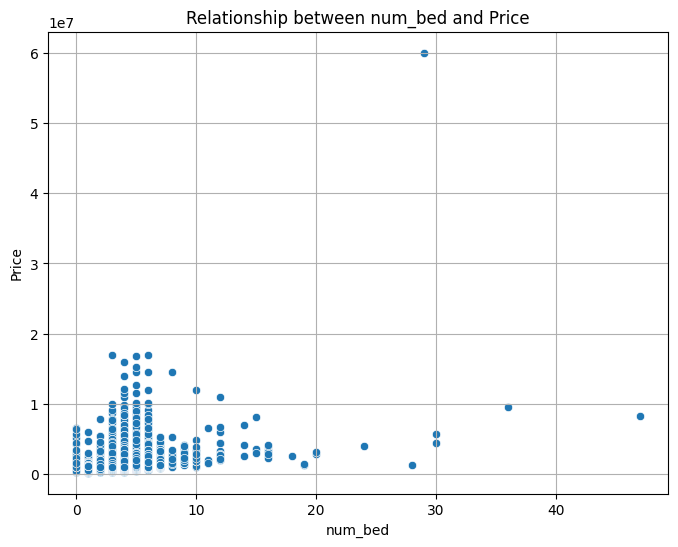

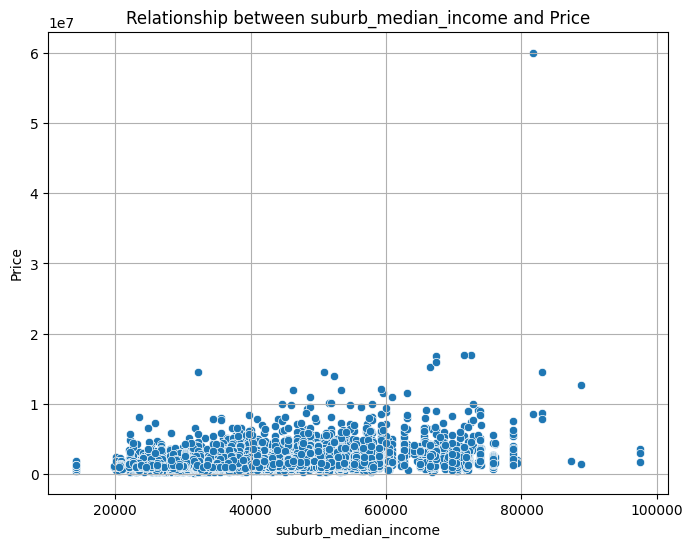

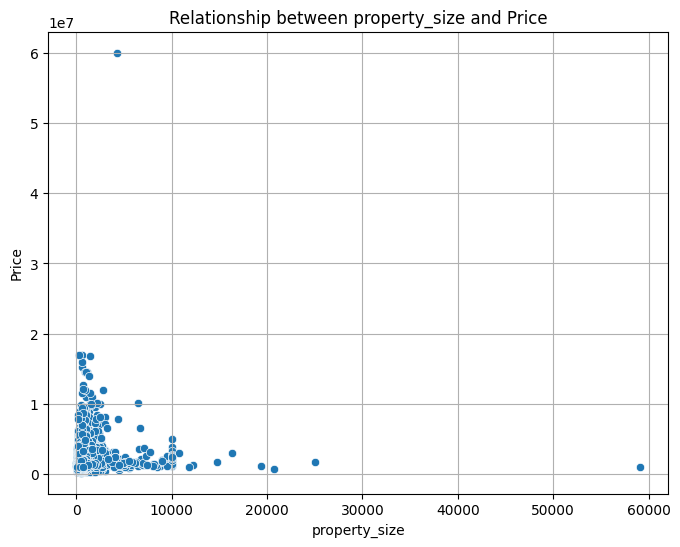

In [ ]:
# Visualizing relationship between top features and price
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data['price'])
    plt.title(f'Relationship between {feature} and Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

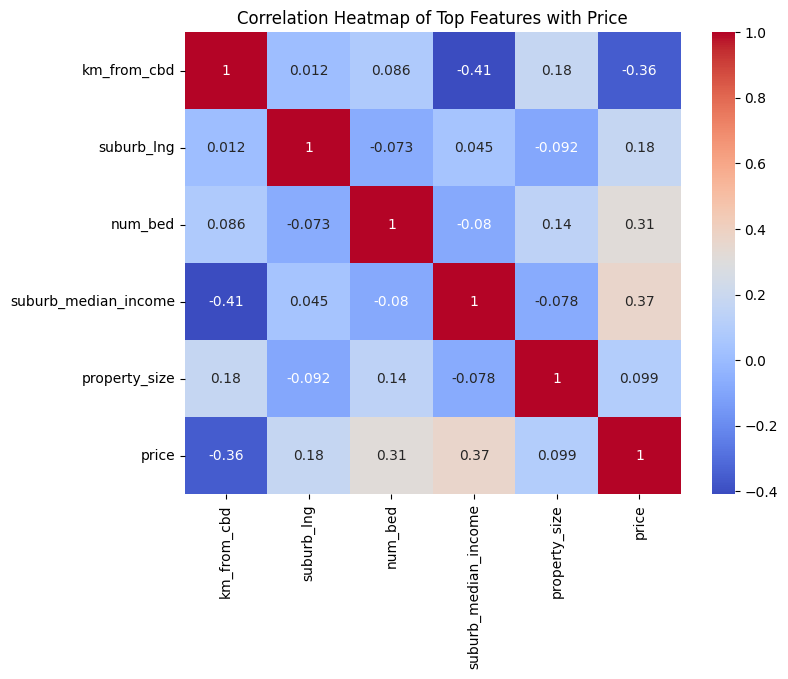

In [ ]:
# Heatmap of correlation between top features and price
top_features_with_price = np.append(top_features, 'price')
correlation_matrix = data[top_features_with_price].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features with Price')
plt.show()

**7. Conclusion**


*   Through this study, I acquired a comprehensive understanding of predicting house prices using the Decision Tree model. House price prediction is a complex task influenced by various factors. Predicting the price of a house while considering these various variables becomes a multifaceted task that must be approached from many aspects. While undertaking this project, I delved deeper into the practical application of the Decision Tree model.

*   Grasping the architecture and fundamental principles of Decision Trees is pivotal. It aids in enhancing the model's prediction accuracy and in circumventing overfitting. Additionally, analyzing the significance of features was instrumental in understanding how certain attributes influence house prices predominantly.

*   The hands-on experience of constructing the model and applying it to real-world data accentuated the gap between theoretical knowledge and its practical implementation. Addressing real data challenges such as missing values, noise, and outliers underscored the significance of rigorous data preprocessing.

*   This endeavor has enriched my perspective on data science and machine learning modeling. With the insights garnered, I am now poised to tackle more complex challenges in the future, always aiming for better result.



**8. Reference  List**
